# PMDS FoML 2022 Final Exam

Good morning and happy New Year's Eve!

You have **2.5 hours** to complete today's exam. When finished, you should output a PDF file and
upload to Google Classroom.

There are two types of questions, "Short answer" and "Coding." You might
want to answer the short answer questions and easy coding questions first then come back
to the more difficult ones. Try to answer every question as best you can. I give partial credit!

Good luck!

## Question 1 (Short answer, 10 points)

In linear regression, we assume that the target variable $y$ is distributed according to a normal
distribution with mean $\mathbf{\theta}^T \mathbf{x}$ and variance $\sigma^2$.

Why is it that the optimal parameters
$$\mathbf{\theta}^* = \underset{\mathbf{\theta}}{\operatorname{argmax}}
\prod_{i=1}^m p(y^{(i)} \mid \mathbf{x}^{(i)}; \mathbf{\theta})$$
only involve the coefficients $\theta_0, \theta_1, \ldots$
applied to $\mathbf{x}$ and do not depend on $\sigma$?

*Write your answer here.*


- We see mean = $\mathbf{theta}^T \mathbf{x}$. We can easily see that Mean depends on X and theta. 
- However, the value of sigma can also be formed by X and theta
- So in the above formula we see the occurrence of X and theta, which is also considered the presence of mean and sigma.

## Question 2 (Coding, 20 points)

Consider the dataset in the file `final-data.csv`. It is the same binary classification
dataset you used in the midterm quiz, with two real-valued features $x_1$ and $x_2$ and
a target $y \in \{-1, 1\}$.

In the cell below, write code to read the CSV file as a numpy array, split the data into training and
validation **randomly** with a ratio of 80% training and 20% validation, and plot the data in two plots,
one for the training data and one for the validation data. The two classes should be shown in
different colors in the two plots.


(400, 3)
(400, 2) (400, 1)


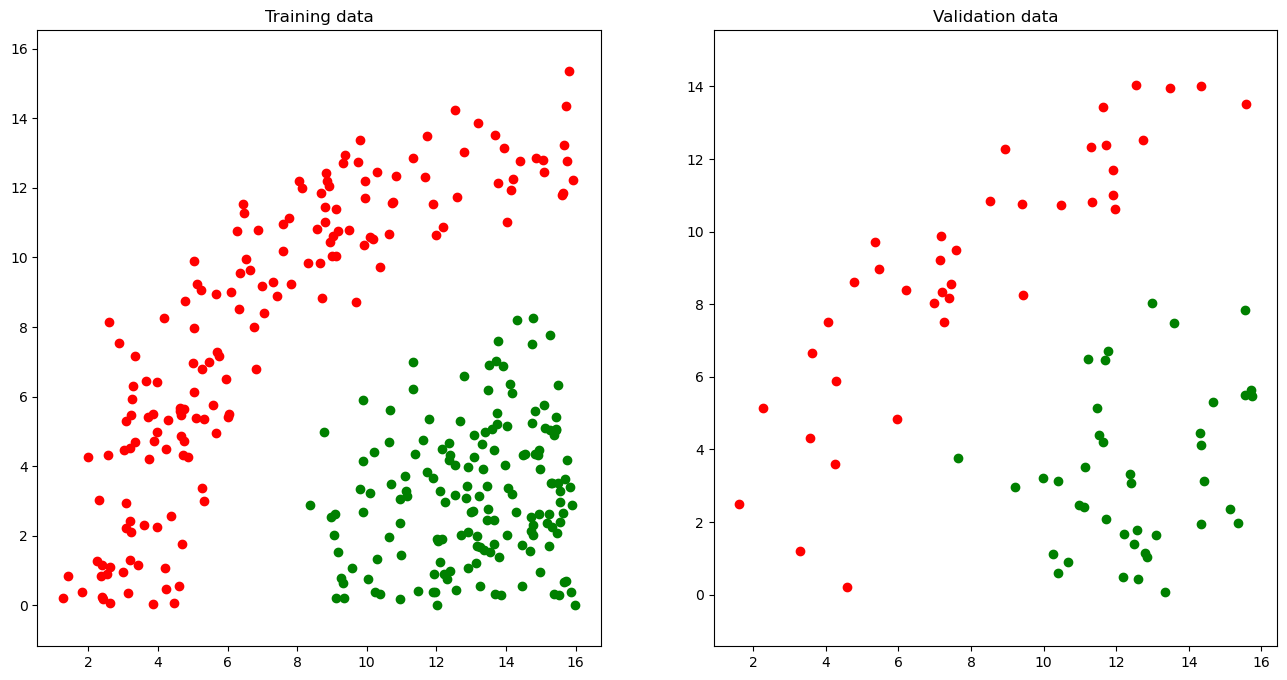

In [2]:
# Reading, splitting, and plotting code goes here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('final-data.csv',header=None)
data = data.to_numpy()
print(data.shape)
X = data[:,:-1]
y = data[:,-1].reshape(-1,1)
print(X.shape, y.shape)
def train_val_split(X,y,test_size):
    m=X.shape[0]
    idx=np.arange(m)
    np.random.shuffle(idx)
    m_train=int ((1-test_size)*m)
    train_idx = idx [:m_train]
    val_idx = idx [m_train:]
    X_train = X [train_idx,:]
    X_val = X [val_idx,:]
    y_train = y[train_idx,:]
    y_val = y [val_idx,:]
    return X_train,X_val,y_train,y_val

X_train,X_val,y_train,y_val = train_val_split(X,y,0.2)
def plot_data(X, y, title):
    X_0 = X[(y==-1).flat]
    X_1 = X[(y==1).flat]
    plt.plot(X_0[:,0], X_0[:,1], 'ro')
    plt.plot(X_1[:,0], X_1[:,1], 'go')
    plt.title(title)
    plt.axis('equal')
    
plt.rcParams["figure.figsize"] = (16, 8)
plt.subplot(1,2, 1)
plot_data(X_train, y_train, 'Training data')
plt.subplot(1,2, 2)
plot_data(X_val, y_val, 'Validation data')


## Question 3 (Coding, 10 points)

Since the data in Question 2 are not linearly separable, we would need a nonlinear classifier
such as a RBF SVM or a neural network.

In the cell below, write code to calculate the Gram matrix (kernel matrix) $\mathtt{K}$ for
the Gaussian/RBF kernel with $\sigma=1.0$.


In [19]:
# Code to calculate K goes here

def rbf_kernel(X, sigma):
    m = X.shape[0]
    K = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            K[i, j] = (X[i,:] - X[j,:]) @ (X[i,:] - X[j,:])
    K = np.exp(- K / 2 / sigma / sigma)
    return K

K = rbf_kernel(X_train, 1)
print('Shape of K: ',K.shape)
K


Shape of K:  (320, 320)


array([[1.00000000e+00, 2.01343846e-04, 5.70973774e-04, ...,
        3.72006906e-13, 7.88161805e-05, 4.21628460e-20],
       [2.01343846e-04, 1.00000000e+00, 9.85666353e-04, ...,
        1.14361843e-03, 1.55056126e-02, 3.44317042e-14],
       [5.70973774e-04, 9.85666353e-04, 1.00000000e+00, ...,
        8.13336304e-12, 1.00445898e-08, 1.72179536e-07],
       ...,
       [3.72006906e-13, 1.14361843e-03, 8.13336304e-12, ...,
        1.00000000e+00, 1.88091600e-04, 2.43566116e-21],
       [7.88161805e-05, 1.55056126e-02, 1.00445898e-08, ...,
        1.88091600e-04, 1.00000000e+00, 8.37990603e-26],
       [4.21628460e-20, 3.44317042e-14, 1.72179536e-07, ...,
        2.43566116e-21, 8.37990603e-26, 1.00000000e+00]])

## Question 4 (Short answer, 10 points)

Suppose that the data in Question 2 were not labeled and the goal was to cluster them.
Which clustering method, k-means or the GMM, would be better suited to this dataset?

*Write your answer here.*


- One of differences between the two methods is that k-means makes crisp partitions while GMM makes soft partitions.
- GMM can also fit and return overlapping clusters, whereas k-means certainly imposes a hard break between clusters
- After plotting, we see that the dataset is not overlapping between 2 classes and  the means of 2 labels are not the same (or close to each other)
- So we can use k-means


## Question 5 (Short answer, 10 points)

If you were to design a neural network to classify the data from Question 2, what would be
the structure of the network (number of layers, number of units, activation functions, etc.)?

*Write your answer here.*

I will set:

2 hidden layers and 1 output layer
- Layer 1: 16 units, activation function: Relu
- Layer 2: 32 units, activation function: Relu
- Layer 3: 1 unit, activation function: Sigmoid

16 units in layer 1 and 32 units in layer 2.
Layer 3 is ouput layer and we have a binary classification problem, the ou

For the shape of the weight matrices and bias vectors:
- $\mathtt{W}^{[1]}: 16 \times 2$
- $\mathbf{b}^{[1]}: 16 \times 1$
- $\mathtt{W}^{[2]}: 32 \times 16$
- $\mathbf{b}^{[2]}: 32 \times 1$
- $\mathtt{W}^{[3]}: 1 \times 32$
- $\mathbf{b}^{[3]}: 1 \times 1$


## Question 6 (Coding, 10 points)

Implement the neural network you described in Question 5 using PyTorch.
You only need to provide the Python class inheriting from `torch.nn.Module` here.

In [3]:
y_train[y_train==-1] = 0
y_val[y_val==-1] = 0

In [4]:
import torch

# Classification network


class Network(torch.nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = torch.nn.Linear(2, 16)
        self.fc2 = torch.nn.Linear(16, 32)
        self.fc3 = torch.nn.Linear(32, 1)
        self.sig = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = torch.nn.functional.relu(x)
        x = self.fc2(x)
        x = torch.nn.functional.relu(x)
        x = self.fc3(x)
        x = self.sig(x)
        return x


## Question 7 (Coding, 20 points)

Write a function `train()` using the template below to train the neural network
from Question 6 for a given number of epochs and demonstrate that it is working
correctly by plotting the training and validation loss over the training process.


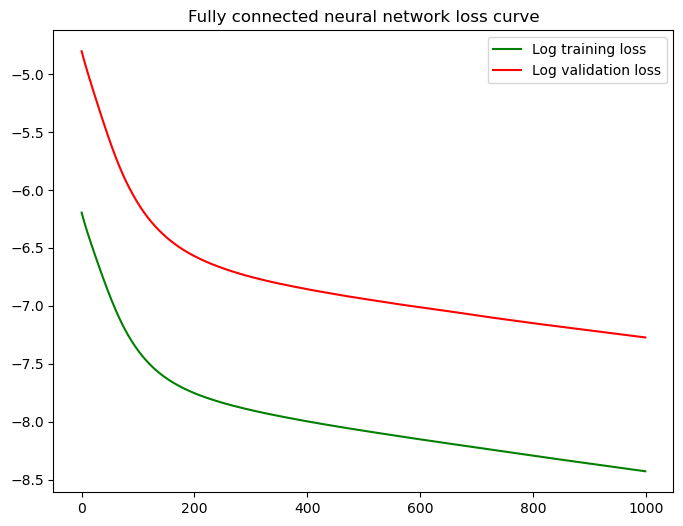

In [5]:
# Network training function
import torch

# Classification network

def train(net, epochs, X_train, y_train, X_val, y_val, alpha):
    
    train_loss = []
    val_loss = []
    
    # Set up data loaders
    X_train_tensor = torch.tensor(X_train, dtype=torch.float)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float).reshape((-1,1))
    X_val_tensor = torch.tensor(X_val, dtype=torch.float)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float).reshape((-1,1))
    loss_func = torch.nn.BCELoss()
    optimizer = torch.optim.SGD(net.parameters(), lr = alpha)
    
    # Train for "epochs" epochs
    for epoch in range(epochs):
        net.train()
        net.zero_grad()
        yhat = net(X_train_tensor)
        train_loss_i = loss_func(yhat, y_train_tensor)
        train_loss.append(train_loss_i.item() / X_train.shape[0])
        train_loss_i.backward()
        optimizer.step()
        net.eval()
        yhat = net(X_val_tensor)
        val_loss_i = loss_func(yhat, y_val_tensor)
        val_loss.append(val_loss_i.item() / X_val.shape[0])
    
   
    # Return training and validation loss

    return train_loss, val_loss


net = Network()

#X_train = None
#X_val = None
#y_train = None
#y_val = None

train_loss, val_loss = train(net, 1000, X_train, y_train, X_val, y_val, 0.01)

# Plot train_loss, val_loss


plt.figure(figsize=(8, 6))
plt.plot(np.log(train_loss), 'g-', label='Log training loss')
plt.plot(np.log(val_loss), 'r-', label='Log validation loss')
plt.legend()
plt.title('Fully connected neural network loss curve')
plt.show()


In [6]:
from keras.utils import plot_model
#plot_model(cnn)

2023-01-04 20:03:03.044860: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


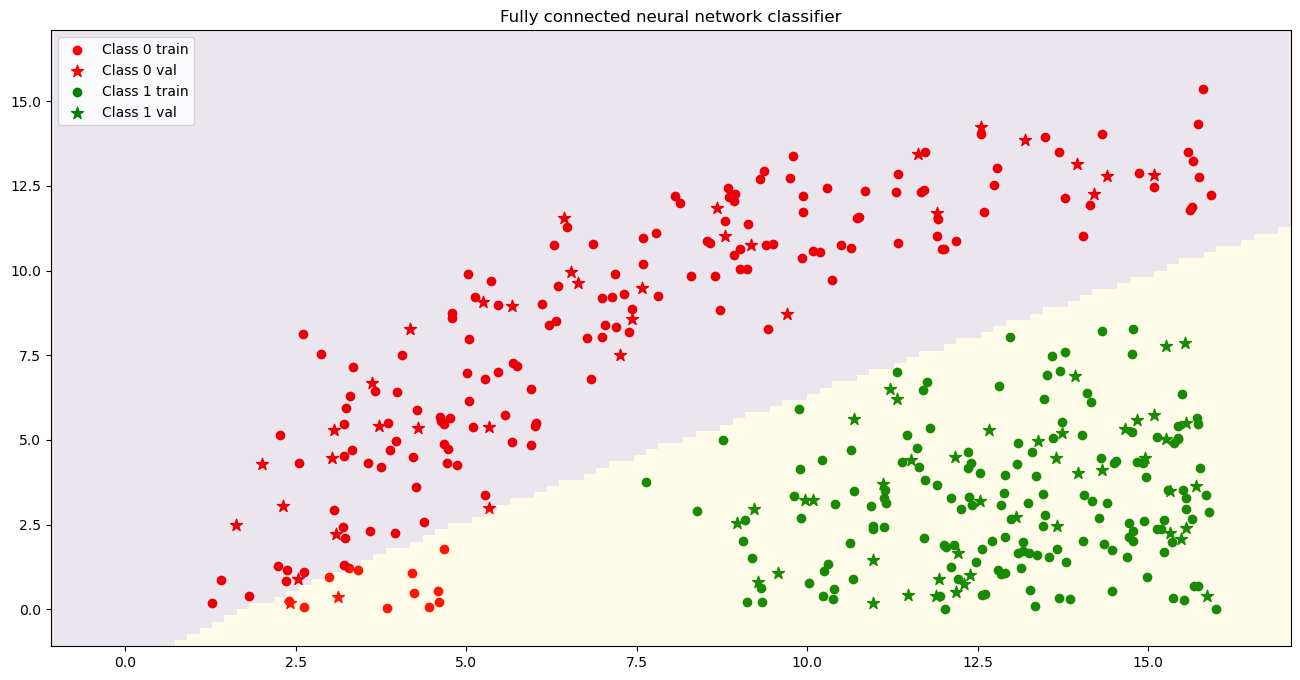

In [17]:
#plt.figure(figsize=(8, 6))
plt.scatter(X_train[(y_train==0).flat,0], X_train[(y_train==0).flat,1], c='r', marker='o', label='Class 0 train')
plt.scatter(X_val[(y_val==0).flat,0], X_val[(y_val==0).flat,1], s=80, c='r', marker='*', label='Class 0 val')
plt.scatter(X_train[(y_train==1).flat,0], X_train[(y_train==1).flat,1], c='g', marker='o', label='Class 1 train')
plt.scatter(X_val[(y_val==1).flat,0], X_val[(y_val==1).flat,1], s=80, c='g', marker='*', label='Class 1 val')
x = np.linspace(-1, 17, 100)
y = np.linspace(-1, 17, 100)
xv, yv = np.meshgrid(x, y)
X_grid_tensor = torch.tensor(np.concatenate((xv.reshape(-1,1), yv.reshape(-1,1)), 1), dtype=torch.float)
y_grid = net(X_grid_tensor).detach().numpy().reshape(100, 100)
y_grid[y_grid>0.5] = 1
y_grid[y_grid<=0.5] = 0
plt.pcolormesh(x, y, y_grid, alpha=0.1, linewidth=0, antialiased=True)
plt.legend()
plt.title('Fully connected neural network classifier')
plt.show()

## Question 8 (Coding, 10 points)

Write a function `predict()` using the template below that runs inference
using the trained network from Question 7 on a test/validation set.

In [18]:
# Inference function

def predict(net, X):
    
    # Set up data loader
    X_new = torch.tensor(X, dtype=torch.float)
    
    # Run net on X
    y_new = net(X_new).detach().numpy()
    
    # return predictions
    y_new[y_new>0.5] = 1
    y_new[y_new<=0.5] = 0
    return y_new


y_pred = predict(net, X_val)
accuracy = (y_pred == y_val).mean()

print('Validation accuracy: %f' % accuracy)

Validation accuracy: 0.975000
